# Support Vector Machines - Exercise 1

In this exercise, we'll be using support vector machines (SVMs) to build a spam classifier.  We'll start with SVMs on some simple 2D data sets to see how they work.  Then we'll do some pre-processing work on a set of raw emails and build a classifier on the processed emails using a SVM to determine if they are spam or not.

The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear SVM works on the data set for varying values of C (similar to the regularization term in linear/logistic regression).  Let's load the data.
## Exercise 1
#### 1. Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Load data
Load the file *ejer_1_data1.mat*. Find the way for loading this kind of file.

In [2]:
#pista, from scipy.io

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

In [3]:
# keys

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

#### 3. Create a DataFrame with the features and target

,x1,x2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


0    30
1    21
Name: y, dtype: int64

#### 4. Plot a scatterplot with the data

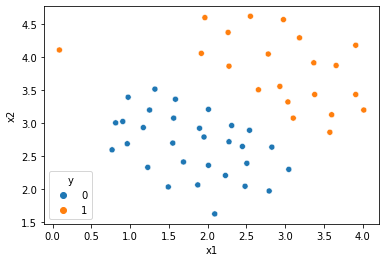

Notice that there is one outlier positive example that sits apart from the others.  The classes are still linearly separable but it's a very tight fit.  We're going to train a linear support vector machine to learn the class boundary.

#### 5. LinearSVC
Declare a Linear SVC with the hyperparamenters:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

In [ ]:
from sklearn.svm import LinearSVC


#### 6. Try the performance (score)
For the first experiment we'll use C=1 and see how it performs.

In [ ]:
# Aquí el ejecicio no esta haciendo el train_test_split, así que haz el fit con todo el dataset

0.9803921568627451

It appears that it mis-classified the outlier.

#### 7. Increase the value of C until you get a perfect classifier

In [ ]:
# Value of C in this case is C = 375
# Do the same thing of previous section: instance the model, fit X and y, get the score

C:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


1.0

This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data.  We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

#### 8. Plot Decission Function
Get the `decision_function()` output for the first model. Plot a scatterplot with X1, X2 and a range of colors based on `decision_function()`

In [26]:
conf_level

array([ 0.80278593,  0.3838553 ,  1.37742261,  0.52109694,  0.33331643,
        0.86860562,  0.68644079,  1.61112044,  0.83441571,  1.16707374,
        1.07316037,  0.22972916,  0.331777  ,  0.79575449,  0.31573087,
        1.27401816,  1.21010843,  0.99988323,  0.56465913,  0.38981932,
       -0.43527164, -0.30885316, -0.68626448, -0.5540297 , -0.33251787,
       -0.29385666, -0.4407223 , -0.9840001 , -0.68564223, -1.32848517,
       -1.00379796, -1.49230926, -0.61142573, -0.68344774, -1.00004185,
       -1.15274784, -1.57841683, -1.35598344, -1.03239924, -1.18504121,
       -0.7714105 , -0.76692628, -0.46650197, -1.        , -0.51034432,
       -0.85864953, -1.55903573, -0.25490236, -1.11364769, -1.54719253,
       -0.70993965])

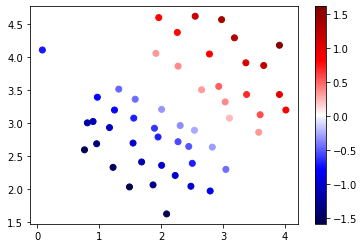

#### 9. Do the same with the second model

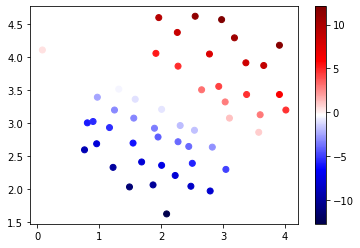

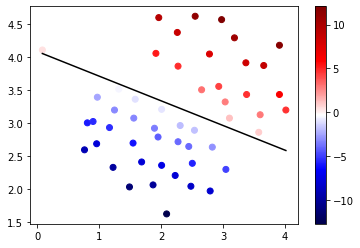

In [42]:
# extra
# w = svc.coef_[0]           # w consists of 2 elements
# b = svc.intercept_[0]      # b consists of 1 element
# x_points = df['x1'].sort_values()    # generating x-points
# y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting 


Now we're going to move from a linear SVM to one that's capable of non-linear classification using kernels.  We're first tasked with implementing a gaussian kernel function.  Although scikit-learn has a gaussian kernel built in, for transparency we'll implement one from scratch.

## Exercise 2

That result matches the expected value from the exercise.  Next we're going to examine another data set, this time with a non-linear decision boundary.

#### 1. Load the data `ejer_1_data2.mat`

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0.107143 , 0.60307  ],
        [0.093318 , 0.649854 ],
        [0.0979263, 0.705409 ],
        ...,
        [0.975806 , 0.439474 ],
        [0.989631 , 0.425439 ],
        [0.996544 , 0.414912 ]]),
 'y': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
       

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

#### 2. Create a DataFrame with the features and target

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [ ]:
# Haz un value_counts() de la columna y 

1    480
0    383
Name: y, dtype: int64

#### 3. Plot a scatterplot with the data

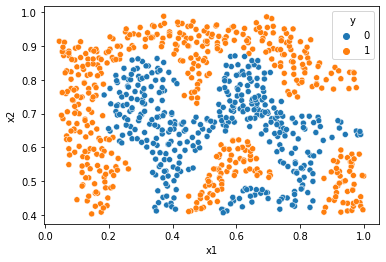

For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data.  To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label.  We'll see from the result that it gets most of them right.

#### 4. Declare a SVC with this hyperparameters
```Python
SVC(C=100, gamma=10, probability=True)
```


#### 5. Fit the classifier and get the score

0.9698725376593279

#### 6. Plot the scatter plot and probability of predicting 0 with a [sequential color](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html) with `predict_proba`

array([3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 1.94004333e-06,
       7.81922850e-03, 3.64288094e-03, 2.85829666e-07, 1.38258813e-02,
       3.00000090e-14, 3.00000090e-14, 1.82296958e-13, 1.59871376e-02,
       5.42095102e-11, 3.00000090e-14, 3.00000090e-14, 1.93570101e-09,
       2.62480091e-01, 5.74566838e-01, 2.37203020e-13, 3.00000090e-14,
       1.84817204e-02, 2.82388615e-03, 1.14741976e-02, 1.35197232e-01,
       2.31251883e-02, 5.58543942e-06, 2.92181325e-06, 7.37731684e-07,
       7.94129980e-06, 2.84489599e-02, 1.74723189e-01, 3.44655803e-02,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 3.00000090e-14,
       3.00000090e-14, 2.63885905e-12, 1.62774432e-09, 3.79649840e-13,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 3.00000090e-14,
       3.00000090e-14, 3.00000090e-14, 3.42765045e-14, 7.52440197e-10,
       6.97277654e-13, 3.00000090e-14, 1.90030736e-08, 5.16145454e-07,
       2.80620996e-03, 8.35999934e-13, 3.00000090e-14, 3.00000090e-14,
      

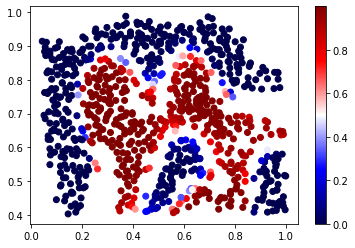